In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import svm
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [ ]:
dataframe = pd.read_csv(r"lego_data.csv",header=None,sep=',')
dataframe.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,726.0,4440.0,6754.0,2034.0,7480.0,6133.0,13.0,0.0,495.0,419.0,0.0,0.0,134.0,14.0,0.0,0.0,26.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,20.0,4.0,3.0,3.0,63.0,66.0,221.0,991.0,140.0,286.0,2208.0,3151.0,86.0,295.0,417.0,0.0,55.0,236.0,32.0,0.0,61.0,184.0,24.0,0.0,38.0,116.0,20.0,0.0,64.0,145.0,166.0,2.0,123.0,571.0,4823.0,1353.0,1.0
1,677.0,2983.0,4738.0,1082.0,2195.0,5083.0,35.0,0.0,83.0,89.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,24.0,25.0,80.0,664.0,129.0,214.0,948.0,1046.0,115.0,229.0,267.0,8.0,181.0,223.0,9.0,0.0,64.0,142.0,8.0,0.0,56.0,113.0,16.0,0.0,53.0,136.0,136.0,0.0,185.0,319.0,3776.0,1392.0,1.0
2,237.0,1524.0,8821.0,1123.0,840.0,448.0,31.0,0.0,1100.0,53.0,0.0,0.0,14324.0,7.0,0.0,0.0,2433.0,0.0,0.0,0.0,155.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,185.0,0.0,0.0,0.0,205.0,565.0,681.0,21.0,99.0,612.0,6025.0,1185.0,73.0,127.0,21.0,0.0,90.0,62.0,0.0,0.0,60.0,49.0,7.0,0.0,43.0,57.0,1.0,0.0,42.0,173.0,40.0,0.0,73.0,562.0,3152.0,681.0,1.0
3,100.0,1557.0,6266.0,3640.0,397.0,540.0,55.0,0.0,2283.0,102.0,0.0,0.0,11406.0,13.0,0.0,0.0,2785.0,0.0,0.0,0.0,251.0,0.0,0.0,0.0,127.0,1.0,0.0,0.0,291.0,6.0,0.0,0.0,305.0,145.0,164.0,262.0,45.0,356.0,1339.0,6561.0,42.0,183.0,157.0,0.0,47.0,95.0,25.0,0.0,42.0,68.0,6.0,0.0,22.0,73.0,5.0,0.0,20.0,188.0,50.0,0.0,53.0,477.0,849.0,73.0,1.0
4,728.0,1744.0,2940.0,276.0,1178.0,93.0,0.0,0.0,1139.0,0.0,0.0,0.0,6967.0,0.0,0.0,0.0,11056.0,0.0,0.0,0.0,1394.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,56.0,11.0,6.0,0.0,33.0,290.0,2861.0,1712.0,36.0,249.0,37.0,0.0,20.0,129.0,0.0,0.0,25.0,95.0,2.0,0.0,22.0,124.0,3.0,0.0,18.0,164.0,87.0,0.0,52.0,352.0,5318.0,2726.0,1.0
5,186.0,1062.0,6259.0,1496.0,329.0,254.0,13.0,0.0,750.0,63.0,0.0,0.0,6076.0,0.0,0.0,0.0,2871.0,0.0,0.0,0.0,104.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,107.0,14.0,0.0,0.0,198.0,856.0,813.0,2.0,120.0,642.0,2842.0,432.0,77.0,54.0,7.0,0.0,56.0,17.0,0.0,0.0,52.0,20.0,0.0,0.0,40.0,18.0,1.0,0.0,52.0,61.0,1.0,0.0,108.0,391.0,610.0,315.0,1.0
6,131.0,902.0,3605.0,622.0,439.0,171.0,0.0,0.0,538.0,8.0,0.0,0.0,1716.0,0.0,0.0,0.0,5837.0,0.0,0.0,0.0,1836.0,0.0,0.0,0.0,373.0,0.0,0.0,0.0,322.0,6.0,0.0,0.0,82.0,145.0,110.0,5.0,36.0,287.0,1174.0,1130.0,38.0,87.0,41.0,0.0,31.0,54.0,6.0,0.0,33.0,48.0,2.0,0.0,21.0,40.0,4.0,0.0,28.0,75.0,33.0,0.0,59.0,182.0,1342.0,651.0,1.0
7,729.0,1473.0,3420.0,1621.0,1005.0,495.0,1.0,0.0,2352.0,106.0,0.0,0.0,11350.0,3.0,0.0,0.0,1779.0,0.0,0.0,0.0,852.0,0.0,0.0,0.0,1265.0,0.0,0.0,0.0,876.0,28.0,1.0,0.0,2398.0,280.0,20.0,4.0,192.0,683.0,4291.0,2479.0,119.0,246.0,95.0,0.0,39.0,175.0,14.0,0.0,61.0,138.0,9.0,0.0,59.0,130.0,4.0,0.0,66.0,242.0,142.0,0.0,240.0,604.0,5745.0,3481.0,1.0
8,1478.0,1279.0,1445.0,122.0,5716.0,340.0,19.0,0.0,672.0,22.0,1.0,0.0,182.0,9.0,0.0,0.0,7.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,20.0,14.0,17.0,0.0,193.0,625.0,4383.0,423.0,107.0,332.0,87.0,0.0,87.0,132.0,9.0,0.0,116.0,106.0,3.0,0.0,276.0,92.0,16.0,0.0,340.0,435.0,83.0,3.0,276.0,885.0,6830.0,2825.0,1.0
9,2674.0,1442.0,1597.0,240.0,4835.0,146.0,0.0,0.0,2277.0,0.0,0.0,0.0,247.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,69.0,12.0,19.0,0.0,273.0,847.0,6963.0,761.0,163.0,659.0,149.0,0.0,277.0,218.0,17.0,0.0,166.0,204.0,26.0,0.0,139.0,161.0,23.0,0.0,166.0,343.0,228.0,1.0,496.0,878.0,10388.0,6664.0,1.0


In [ ]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles, make_moons, make_classification
from sklearn import decomposition

X = dataframe[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,
               33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
               61,62,63]].values
print(X)
y = dataframe[64].values
'''
pca = decomposition.PCA(n_components=1)
pca.fit(X)
X = pca.transform(X)
'''
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=0)


scaler = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

'''
scaler = MinMaxScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
'''

[[7.260e+02 4.440e+03 6.754e+03 ... 5.710e+02 4.823e+03 1.353e+03]
 [6.770e+02 2.983e+03 4.738e+03 ... 3.190e+02 3.776e+03 1.392e+03]
 [2.370e+02 1.524e+03 8.821e+03 ... 5.620e+02 3.152e+03 6.810e+02]
 ...
 [4.631e+03 1.313e+03 6.550e+02 ... 4.080e+02 3.790e+02 5.300e+01]
 [2.033e+03 6.570e+02 1.500e+01 ... 5.100e+01 2.000e+00 0.000e+00]
 [8.537e+03 3.503e+03 6.580e+02 ... 2.205e+03 1.130e+02 0.000e+00]]


'\nscaler = MinMaxScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!\nscaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

In [ ]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
#lineal
#Kernel=0
#msv = svm.SVC(kernel=kernels[Kernel])

#polinomial cuadrático
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=2)

#polinomial cúbico
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=3)
#rbf 
Kernel=3
msv = svm.SVC(kernel=kernels[Kernel],degree=3)
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

msv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

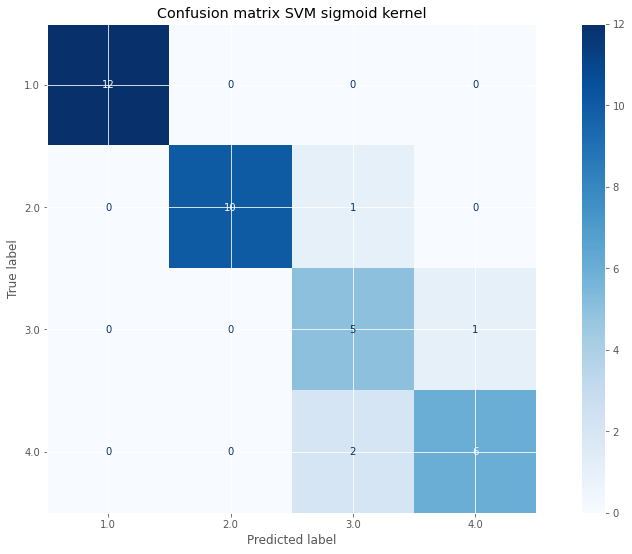

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      0.91      0.95        11
         3.0       0.62      0.83      0.71         6
         4.0       0.86      0.75      0.80         8

    accuracy                           0.89        37
   macro avg       0.87      0.87      0.87        37
weighted avg       0.91      0.89      0.90        37

0.8918918918918919
Accuracy para entrenamiento: 0.9642857142857143
Accuracy para test: 0.8918918918918919
El coeficiente de correlación de Matthews es: 0.8561575346506138


In [ ]:
pred = msv.predict(X_test)
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(msv, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('Confusion matrix SVM sigmoid kernel')
plt.show(matrix)
plt.show()
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))
print('Accuracy para entrenamiento: '+ str(msv.score(X_train,y_train)))
print('Accuracy para test: '+ str(msv.score(X_test,y_test)))

from sklearn.metrics import matthews_corrcoef
coef=matthews_corrcoef(y_test, pred)
print('El coeficiente de correlación de Matthews es: '+str(coef))

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
y_score = msv.fit(X_train, y_train).decision_function(X_test)

